# Data Load and Analysis

In [ ]:
import numpy as np
#import pandas as pd
from google.colab import files
#import io

uploaded = files.upload()
#df2 = pd.read_csv(io.BytesIO(uploaded['0.npy']))


Saving 0.npy to 0.npy


(32, 32, 3) float32
[[[  77.64606     -5.516805   -59.801414 ]
  [  11.05239    -18.973162   -34.613407 ]
  [ -14.20845     34.939457    14.924571 ]
  ...
  [  21.32907    -27.56393   -113.946106 ]
  [ -24.734276   135.64088    107.65258  ]
  [-127.39121     26.940384   -35.842617 ]]

 [[ -35.953167    -8.168556   -48.036922 ]
  [  13.008783    69.57679     40.757088 ]
  [  28.670277   -59.22413     42.890987 ]
  ...
  [ 102.171455   140.10638     95.62801  ]
  [  31.30876   -139.3829      55.57028  ]
  [ 291.6648     -32.63378     37.959614 ]]

 [[ -53.70923     -6.9121065    4.402201 ]
  [ -62.303123    56.622387   -24.277514 ]
  [  45.993507     7.319896     3.5501482]
  ...
  [-137.09021    184.60371   -137.01659  ]
  [ 161.12093     57.953033    52.77509  ]
  [  -1.1453142   31.95269     88.85726  ]]

 ...

 [[ -94.001274  -120.02329   -125.37043  ]
  [ 111.54138    235.23163    153.33049  ]
  [ -25.941196  -208.2818     132.95506  ]
  ...
  [ 108.647804   176.85353     56.68155  

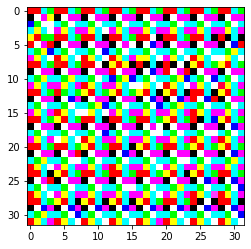

In [ ]:

#print(image)
import matplotlib.pyplot as plt
import torch
image = np.load('0.npy')
print(image.shape, image.dtype)
plt.imshow(image, cmap='binary')
print(image)
print(image.max(), image.min())

#print(image.files)
#print(img)
def normalize8(I):
    mn = I.min()
    mx = I.max()

    mx -= mn

    I = ((I - mn)/mx) * 255
    return I.astype(np.uint8)

#plt.ion()
#plt.figure()
#plt.imshow(image[0].transpose((1,2,0)))

The pixel data ranges in  [-288.66275, 559.62976], so what's the standard range? Based on the document (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html), the range should be [0, 255].
We can do an experiment: change the value of the first element (32 x 3) to 1 value. We expect that either the 1st row or 1st column would be in the same color. 0, 0, 0 is black and 255, 255, 255 is white. When the value is greater than 255, it is displayed as white. When the value is less than 0, it is displayed as black. 

More explanation of grayscale can be found here. https://en.wikipedia.org/wiki/Grayscale. A good hint is provided there that the bit number doesn't play an important role as we can always take the most significant bits to compute the gray scale. This means that scalar multiplication on the key matrix doesn't matter as long as we can normalize before displaying. Therefore the $W^{-1}$ we use can be ranging from 0 to 1. After the transformation, we just need to normalize it.

It's still a question whether we need to turn RGB to grayscale.

We find that R,G,B could be separated before analysis. We can simply assign other channels to 255



[1, 2]
559.62976 -279.18094
[0, 2]
343.51242 -253.30927
[0, 1]
255.0 -288.66275


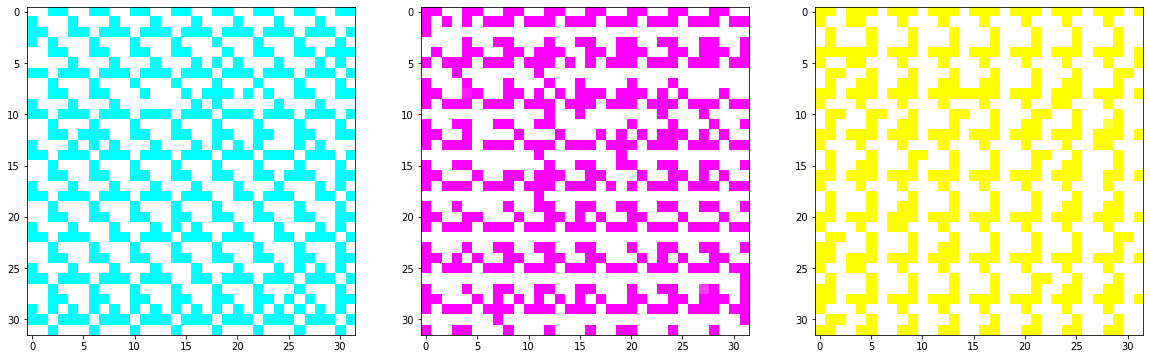

In [ ]:
def print_test(rgb):
  test = image.copy()
  range = [0, 1, 2]
  range.remove(rgb)
  print(range)
  test[:,:,range] = 255
  #plt.imshow(test, cmap='binary')
  axs[rgb].imshow(test, cmap='binary')
  print(test.max(), test.min())

fig, axs = plt.subplots(1,3, figsize=(20,20))

print_test(0)
print_test(1)
print_test(2)

# Stage 1

## MNIST

To better understand the impact from encyption, we'd better download MNIST dataset and do some experiments.

https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
https://www.datascienceweekly.org/tutorials/pytorch-mnist-load-mnist-dataset-from-pytorch-torchvision
https://nextjournal.com/gkoehler/pytorch-mnist

The source code of class MNIST
https://github.com/pytorch/vision/blob/main/torchvision/datasets/mnist.py#L84

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
#mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
#mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
#print(len(mnist_trainset),len(mnist_testset))


In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape, example_targets.shape)
print(example_targets[0])

torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor(4)


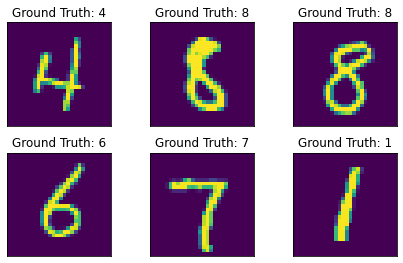

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])


In [ ]:
print(example_data[0][0])
print(example_data[0][0].max(), example_data[0][0].min())
print(example_data.max(), example_data.min())

tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

## Grayscale consideration

How about turning an image from greyscale to RGB?

https://stackoverflow.com/questions/58778867/how-can-i-convert-mnist-data-to-rgb-format

https://discuss.pytorch.org/t/grayscale-to-rgb-transform/18315

As shown below, one way is just to stack three channels with the same intensity. However, this might not be necessary. If the cmap value is not specified, the image is automatically turned to a colored map

torch.Size([28, 28])


torch.Size([28, 28])

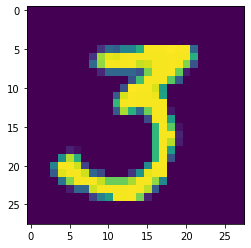

In [ ]:
x = example_data[0][0]
plt.imshow(x,  interpolation='none')
print(x.shape)
#x.unsqueeze_(2)
#print(x.shape)
#x = x.repeat(1, 1, 3)
y = torch.stack([x,x,x],2)
x.shape
#x = torch.reshape(x, (28, 28, 3))
x.shape
#plt.imshow(x,  interpolation='none')

torch.Size([28, 28])
torch.Size([28, 28, 3])
tensor(0.)


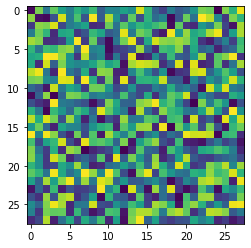

In [ ]:
xx = torch.rand(28,28)
y =torch.stack([xx,xx,xx],2)
print(xx.shape)
print(y.shape)
print(torch.norm(y[:,:,0] - xx))
plt.imshow(xx, interpolation='none')


Maybe we need to turn RGB to grayscale before classification. How to do that?

https://www.tutorialspoint.com/pytorch-how-to-convert-an-image-to-grayscale#:~:text=To%20convert%20an%20image%20to%20grayscale%2C%20we%20apply%20Grayscale(),transforms%20module.



(32, 32, 3)


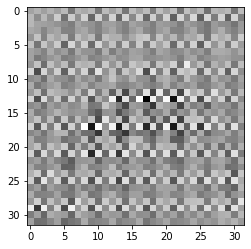

In [ ]:
def rgb_to_grayscale(rgb_image):
    return np.dot(rgb_image, [0.2989, 0.5870, 0.1140])

test = image.copy()
print(test.shape)
test_gray = rgb_to_grayscale(test)


#test_pil = torchvision.transforms.ToPILImage()
#image_gray = torchvision.transforms.functional.rgb_to_grayscale(test_pil)
#img = Image.open(test_pil).convert('RGB')
#img.show()
#print(test_pil)
#test_ts = torch.from_numpy(test)
#print(test_ts.shape)
#test_ts.reshape([3, 32, 32])

plt.imshow(test_gray, cmap='binary')

## Creating modified images

Some changes are tolerabe to the CNN while others are not.

Why is the kernel size 1x16 working well for the classification? It is because the original graph in the block is broken. However, the graph structure between blocks is reserved. This may have two inference:
1. If we use a CNN with the stride size equal to the key matrix size, it could match the encrption mechanism better.
2. If we use the filter crossing block borders, the CNN could be more sensitive to the change

Therefore, we can design the experiment as below.
1. create random deviation on the original image. We can control its magnitude
2. compute the difference score with one of the metrics in the previous block.
3. feed data to a CNN for a regression task. We can provide 10% correct images and 90% modified images, but this ratio could be adjusted.

### Define a metric for picture difference

When comparing two images, a common way to measure the difference between them is to use a pixel-wise metric that calculates the difference between corresponding pixels in the two images. There are several metrics that can be used to measure the pixel difference between two images, including:

Mean squared error (MSE): This metric calculates the average squared difference between each pixel in the two images. It is given by the formula:

$MSE = (1 / N) * \Sigma_{i=1}^N (I1_i - I2_i)^2$

where N is the total number of pixels in the image, I1_i and I2_i are the intensity values of the i-th pixel in the first and second images, respectively.

Peak signal-to-noise ratio (PSNR): This metric measures the ratio between the maximum possible pixel value and the root mean squared error (RMSE) between the two images. It is given by the formula:

$PSNR = 20 * log_{10}(MAX_i / RMSE)$

where MAX_I is the maximum pixel value (usually 255 for 8-bit images), and RMSE is the root mean squared error, which is calculated as:

$RMSE = \sqrt{(1 / N) * \Sigma_{i=1}^N (I1_i - I2_i)^2}$

Structural similarity index (SSIM): This metric measures the structural similarity between the two images by taking into account the luminance, contrast, and structural similarities. It is a more complex metric that involves calculating several local windows and comparing the statistics of the corresponding patches in the two images.

Normalized cross-correlation (NCC): This metric measures the similarity between two images by calculating the correlation between corresponding pixels in the two images. It is given by the formula:

$NCC = \Sigma_{i=1}^N (I1_i - \bar{I1}) * (I2_i - \bar{I2}) / (\sqrt{\Sigma_{i=1}^N (I1_i - \bar{I1})^2} * \sqrt{\Sigma_{i=1}^N (I2_i - \bar{I2})^2})$

where mean(I1) and mean(I2) are the mean intensity values of the two images.

Mean squared error (MSE):

J. C. Russ, "The Image Processing Handbook", 6th edition, CRC Press, 2011.
D. Kundur and D. Hatzinakos, "Digital Watermarking using Multiresolution Wavelet Decomposition", Proceedings of the IEEE International Conference on Image Processing, Vol. 1, pp. 591-594, 1998.
Peak signal-to-noise ratio (PSNR):

H. R. Sheikh, A. C. Bovik, and G. de Veciana, "An Information Fidelity Criterion for Image Quality Assessment using Natural Scene Statistics", IEEE Transactions on Image Processing, Vol. 14, No. 12, pp. 2117-2128, 2005.
Structural similarity index (SSIM):

Z. Wang, A. C. Bovik, H. R. Sheikh, and E. P. Simoncelli, "Image quality assessment: from error visibility to structural similarity", IEEE Transactions on Image Processing, Vol. 13, No. 4, pp. 600-612, 2004.
A. Mittal, A. K. Moorthy, and A. C. Bovik, "No-Reference Image Quality Assessment in the Spatial Domain", IEEE Transactions on Image Processing, Vol. 21, No. 12, pp. 4695-4708, 2012.
Normalized cross-correlation (NCC):

R. Szeliski, "Computer Vision: Algorithms and Applications", Springer, 2010.
G. Bjontegaard, "Calculation of Average PSNR Differences between RD-Curves", ITU-T VCEG-M33, 2001.

In [ ]:
def normalize(tensor):
    return (tensor - torch.amin(tensor, dim=(2,3)).view(tensor.shape[0], 1, 1, 1)) / (torch.amax(tensor, dim=(2,3)) - torch.amin(tensor, dim=(2,3))).view(tensor.shape[0], 1, 1, 1) * 255

def diff(img1, img2):
  #print(img1.size(dim=2), img2.size(dim=3))
  return(torch.sum(torch.square(normalize(img1) - normalize(img2)), (2, 3)) / (img1.size(dim=2) * img2.size(dim=3)))

### Apply random variation
We take the pixel value in gray scale and apply a random variation of [-v, v]. The range of v is {v $\in$ Z | 1 <= v <= 10 }

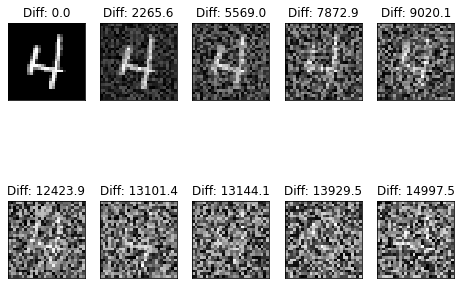

In [ ]:




def convert(example_data):
  std_data = normalize(example_data)
  batch_size = std_data.shape[0]
  
  mod_data = torch.empty(0, 1, 28, 28)
  labels = torch.empty(0)
  MAX = 10
  for i in range(MAX):
    new_data = std_data + 128 * i * torch.rand([batch_size, 1, 28, 28])
    #mod_data.append(new_data)
    mod_data = torch.cat((mod_data, new_data), 0)
    #difference = diff(new_data, std_data)
    #print(labels.shape, difference.shape)
    labels = torch.cat((labels, diff(new_data, std_data).squeeze()),0)
    #print(temp.size())
    #print(new_data)
    #labels.append(difference)
  #print(mod_data[0][0][0], labels[0][0][0])
  #plt.imshow(mod_data[9][0][0], cmap="gray", interpolation='none')
  #nom_labels = normalize(labels)
  return mod_data, labels

  

  

 
data, target = convert(example_data)
#print(data.shape, target.shape)
fig = plt.figure(figsize=(8, 6))
for i in range(10):
  plt.subplot(2,5,i+1)
  #plt.tight_layout()
  plt.imshow(data[i*batch_size_train][0], cmap="gray", interpolation='none')
  t_disp = format(target[i*batch_size_train], '.1f')
  plt.title("Diff: {}".format(t_disp))
  plt.xticks([])
  plt.yticks([])
  #fig.subplots_adjust(hspace=0.5)
  



In [ ]:
import torch

x = torch.tensor([
    [[-0.3000, -0.2926],[-0.2705, -0.2632]],
    [[-0.1821, -0.1747],[-0.1526, -0.1453]],
    [[-0.0642, -0.0568],[-0.0347, -0.0274]]
])

print(torch.amax(x, dim=(1, 2)))

tensor([-0.2632, -0.1453, -0.0274])


## Senstive CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SensitiveCNN(nn.Module):
    def __init__(self):
        super(SensitiveCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 28, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(28, 56, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(56 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
## uncomment for GPU
#network.cuda()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=4)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=4)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x # F.log_softmax(x)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    mod_data, mod_target = convert(data, batch_size_train)
    optimizer.zero_grad()
    output = network(mod_data)
    #print(output)
    loss = F.mse_loss(output, mod_target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      #print(data.shape, target.shape)
      mod_data, mod_target = convert(data, batch_size_test)
      #print(mod_data.shape, mod_target.shape)
      output = network(mod_data)
      #print(output.shape, mod_target.shape)
      test_loss += F.mse_loss(output, mod_target, size_average=False).item()
      #pred = output.data.max(1, keepdim=True)[1]
      #correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}\n'.format(
    test_loss))
  

#test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

<ipython-input-53-3f9466a8b734>:8: UserWarning: Using a target size (torch.Size([640])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(output, mod_target)


Train Epoch: 1 [0/60000 (0%)]	Loss: 908.318481
Train Epoch: 1 [640/60000 (1%)]	Loss: 6157882880.000000
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2769984768.000000
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1178748800.000000
Train Epoch: 1 [2560/60000 (4%)]	Loss: 501546848.000000
Train Epoch: 1 [3200/60000 (5%)]	Loss: 213404016.000000
Train Epoch: 1 [3840/60000 (6%)]	Loss: 90801248.000000
Train Epoch: 1 [4480/60000 (7%)]	Loss: 38634972.000000
Train Epoch: 1 [5120/60000 (9%)]	Loss: 16438747.000000
Train Epoch: 1 [5760/60000 (10%)]	Loss: 6994567.000000
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2976156.500000
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1266302.500000
Train Epoch: 1 [7680/60000 (13%)]	Loss: 538817.562500
Train Epoch: 1 [8320/60000 (14%)]	Loss: 229251.093750
Train Epoch: 1 [8960/60000 (15%)]	Loss: 97552.664062
Train Epoch: 1 [9600/60000 (16%)]	Loss: 41507.203125
Train Epoch: 1 [10240/60000 (17%)]	Loss: 17662.675781
Train Epoch: 1 [10880/60000 (18%)]	Loss: 7516.440918
Train Epoch: 1 [1152

<ipython-input-53-3f9466a8b734>:8: UserWarning: Using a target size (torch.Size([320])) that is different to the input size (torch.Size([500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(output, mod_target)
<ipython-input-53-3f9466a8b734>:32: UserWarning: Using a target size (torch.Size([10000])) that is different to the input size (torch.Size([15625, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  test_loss += F.mse_loss(output, mod_target, size_average=False).item()



Test set: Avg. loss: 13570.0949

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.091265
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.091871
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.088001
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.094499
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.094555
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.090020
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.096673
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.092538
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.091724
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.090530
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.093290
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.092876
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.092656
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.087915
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.093830
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.096081
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.092139
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.089592
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.088444
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.09

In [ ]:


# Load the .pth file for debugging
checkpoint = torch.load("model.pth")

# Print the keys of the checkpoint dictionary
print(checkpoint.keys())

# Access the model parameters
print(checkpoint["conv1.weight"].shape)
print(checkpoint["conv2.weight"].shape)




odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])
torch.Size([32, 1, 3, 3])
torch.Size([64, 32, 3, 3])


Text(0, 0.5, 'mean square error loss')

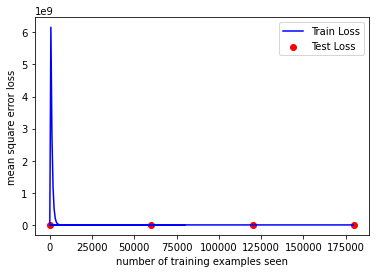

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('mean square error loss')


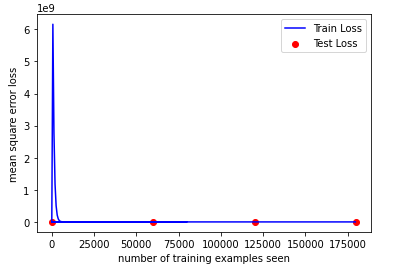

# Stage 2


The weights of the key matrix are in the range of [-1,1], In the extream case, the encypted value could be as large as 48 * 255.

Now we can try to list the steps in stage 2.
1. enrypt the original image
2. reshape them as the input of our model
3. apply split, concatenate and view before the normal CNN
4. use normal CNN to train
5. record the classification result 
6. recover parameter $W^{-1}$
7. measure the image difference.


The R channel is actually 0, 3, 6, ... element in the vector, so the corresponding row is 0, 3, 6, .... We can still divide the weight matrix to 9 blocks, but it's difficult to use divide and conquer strategy.

In [ ]:
## This is a test cell for reshape and view

import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

def forward_test(x):
  # Split the input tensor into 4x4 blocks
  x_blocks = [x[:, :, i:i+4, j:j+4].contiguous() for i in range(0, 28, 4) for j in range(0, 28, 4)]
  
  # Stack the blocks into a tensor with shape (49, batch_size, 1, 4, 4)
  x_stacked = torch.stack(x_blocks, dim=0)
  print(x_stacked.shape)
  # Apply the linear transformation to each block
  #x_transformed = nn.Linear(x_stacked.view(-1, 16), in_features=16, out_features=16)
  
  # Reshape the transformed tensor to have shape (batch_size, 49, 16)
  x_reshaped = x_stacked.view(x_stacked.shape[0], x.shape[0], -1)
  print(x_reshaped.shape)
  # Concatenate the transformed blocks along the feature dimension
  x_split = torch.split(x_reshaped, 1, dim=1)
  print(x_split.shape)
  x_cat = torch.cat(x_split, dim=0)
  
  print(x_cat.shape)
  # Reshape the concatenated tensor to have shape (batch_size, 1, 784)
  x_final = x_cat.view(x.shape[0], 1, 28, 28)
  
  return x_final


result = forward_test(example_data)
print(result.shape)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(example_data[238][0], interpolation='none')
axs[1].imshow(result[238][0], interpolation='none')


torch.Size([49, 1000, 1, 4, 4])
torch.Size([49, 1000, 16])


AttributeError: ignored

In [ ]:
import torch

# Create a tensor of shape [7, 16]
t_in = torch.randn(7, 16)

# Reshape the tensor to [4, 28] while preserving the first 4 elements of each row
t_out = torch.zeros(4, 28)
for i in range(7):
    t_out[:, i*4:(i+1)*4] = t_in[i, :4].view(4, 1)

# Check the shapes of the tensors
print(t_in)   # Output: torch.Size([7, 16])
print(t_out)  # Output: torch.Size([4, 28])


tensor([[ 0.1393, -0.2123,  0.1332, -0.6446, -0.9830,  0.0657, -2.2399, -1.0341,
         -1.9518,  1.3241,  0.9550,  0.0457, -0.8406,  0.4174, -1.1276, -0.3088],
        [ 1.2018, -0.5131, -0.0502,  0.7732, -0.9730,  0.3778,  1.3534,  0.8059,
         -0.0760, -0.4707,  1.1949, -1.1158,  0.6620,  0.3588, -1.8436, -0.7941],
        [-0.8187,  0.8093, -0.5988,  0.4436, -2.5788,  1.4817, -0.0316,  0.2458,
         -0.0778,  0.8210, -1.1223,  3.8883, -0.0838, -0.5991,  0.3711, -0.3595],
        [-0.3125, -0.6689, -0.9471,  0.0185,  0.0543,  1.5132, -0.8911,  1.4240,
          0.6891, -2.1514, -0.3642,  2.1417,  1.3651,  0.7749,  0.3857,  1.0954],
        [-1.1906, -0.2270,  0.7786,  0.1545,  0.3784, -0.8632, -1.6048, -0.8646,
          0.2946,  1.1909,  0.7471, -1.9012,  1.0414,  0.1624, -2.0552,  1.1631],
        [ 0.9320,  0.4955, -0.6701,  1.0221,  0.0465, -0.8338,  0.4628,  0.2209,
          0.3499, -1.9687,  0.2103,  0.7669,  1.2861, -0.7240, -0.1973, -1.1069],
        [-0.0328, -1.0

In [ ]:
import torch

# Define the mapping and input tensors
mapping = torch.tensor([[1, 1], [2, 2], [5, 3], [6, 4], [3, 5], [4, 6], [7, 7], [8, 8]])
input_tensor = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])

# Create an empty tensor to hold the output
output_tensor = torch.zeros_like(input_tensor)

# Iterate over each row of the mapping tensor and set the corresponding
# element in the output tensor to the value of the input tensor at the
# index specified by the mapping
for i in range(mapping.shape[0]):
    output_tensor[mapping[i, 1]-1] = input_tensor[mapping[i, 0]-1]

print(output_tensor)


tensor([1, 2, 5, 6, 3, 4, 7, 8])


In [ ]:
import torch

def construct_mapping():
  # Create a tensor with shape [112] and values [0, 1, 2, ..., 111]
  s = torch.arange(112)
  print(s.view(1,112))
  #print(source.view(4,28))
  # Reshape the tensor to [4, 28] with the desired pattern
  t = s.clone().reshape(4,28)
  t[0] = torch.tensor([0, 1, 2, 3, 16,17,18,19, 32,33,34,35, 48,49,50,51, 64,65,66,67, 80,81,82,83, 96, 97, 98, 99])
  for i in range(1, 4):
      t[i] = t[0] + i*4
  #print(t.view(4,28))
  return torch.cat((s.view(1,112),t.view(1,112)), dim=0)

print(construct_mapping())


tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]])
tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  

## Encrypt the image

### For loop approach

torch.Size([16, 16])


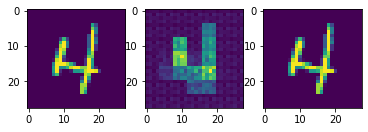

In [ ]:
import matplotlib.pyplot as plt
def encrypt(img, key):
  #fig, axs = plt.subplots(14, 7)
  assembled_image = torch.zeros_like(img)
  for i in range(7):
    for j in range(7):
      img_cropped = torchvision.transforms.functional.crop(img, top=4*i, left=4*j, height=4, width=4)
      #axs[i, j].imshow(img_cropped[0][0], interpolation='none')

      #print(img_cropped.shape)
      img_reshaped = img_cropped.contiguous().view(img.shape[0], 1, 16, 1)
      #print(img_reshaped[0][0])
      
      #print(w_matrix)
      #print(img_reshaped[0][0])
      #print(img_reshaped.shape)
      img_encrypted = torch.matmul(key.expand(img.shape[0], 1, 16, 16), img_reshaped)
      img_pieces = img_encrypted.view(img.shape[0], 1, 4, 4)
      #org = torch.matmul(torch.inverse(w_matrix), encrypted)
      #print(org)
      #axs[7+i, j].imshow(img_pieces[0][0], interpolation='none')
      assembled_image[:,:,4*i:4*i+4,4*j:4*j+4] = img_pieces
  return assembled_image

torch.manual_seed(1121)
        #print(img_reshaped.shape)
w_matrix = torch.rand(16, 16)
w_matrix_m1 = torch.inverse(w_matrix)

print(w_matrix.shape)
#print(example_data.shape)
img_encrypted = encrypt(example_data, w_matrix)
img_decrypted = encrypt(img_encrypted, w_matrix_m1)
fig, axs = plt.subplots(1, 3)
axs[0].imshow(example_data[0][0], interpolation='none')
axs[1].imshow(img_encrypted[0][0], interpolation='none')
axs[2].imshow(img_decrypted[0][0], interpolation='none')

### tensor mapping approach

As the recontructing method in the previous cell may not be differentiable, we tried another approach using mapping

torch.Size([64, 1, 49, 4, 4])
tensor([[-0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242]])
torch.Size([64, 1, 49, 16])
tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242])
split: <class 'tuple'> 7 torch.Size([64, 1, 7, 16])
tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242])
tensor([-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -

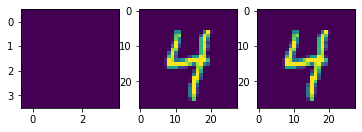

In [ ]:
def construct_mapping():
  # Create a tensor with shape [112] and values [0, 1, 2, ..., 111]
  s = torch.arange(112)
  #print(s.view(1,112))
  #print(source.view(4,28))
  # Reshape the tensor to [4, 28] with the desired pattern
  t = s.clone().reshape(4,28)
  t[0] = torch.tensor([0, 1, 2, 3, 16,17,18,19, 32,33,34,35, 48,49,50,51, 64,65,66,67, 80,81,82,83, 96, 97, 98, 99])
  for i in range(1, 4):
      t[i] = t[0] + i*4
  #print(t.view(4,28))
  return torch.cat((t.reshape(1,112),s.reshape(1,112)), dim=0)

def tensor_map(input_t, mapping):
  output_t = torch.zeros_like(input_t)
  for i in range(mapping.shape[1]):
    output_t[:,:,mapping[1, i]] = input_t[:,:,mapping[0,i]]
  return output_t

def forward_test(x, mapping):
    
    # Split the input tensor into 4x4 blocks
    x_blocks = [x[:, :, i:i+4, j:j+4].contiguous() for i in range(0, 28, 4) for j in range(0, 28, 4)]

    # Stack the blocks into a tensor with shape (49, batch_size, 1, 4, 4)
    x_stacked = torch.stack(x_blocks, dim=2)
    print(x_stacked.shape)
    print(x_stacked[0][0][1])
    #x_snapshot = x_stacked[238][0][1]
    axs[0].imshow(x_stacked[0][0][1], interpolation='none')
    # Reshape the tensor to have shape (batch_size, 49, 16)
    x_reshaped = x_stacked.reshape(x.shape[0], 1, 49, 16)
    print(x_reshaped.shape)
    print(x_reshaped[0][0][1])
    # Split the tensor along the second dimension (block dimension)
    x_split = torch.split(x_reshaped, 7, dim=2)
    print("split:", type(x_split), len(x_split), x_split[0].shape)
    print(x_split[0][0][0][1])
    print(x_split[0][0][0].reshape(112))
    x_mapped = [tensor_map(t.reshape(x.shape[0], 1, 112), mapping).reshape(x.shape[0],1,4, 28) for t in x_split]
    print(x_mapped[0].shape)
    print(x_mapped[0][0][0][0])
    # Concatenate the tensors along the third dimension (feature dimension)
    x_cat = torch.cat(x_mapped, dim=2)
    print("cat:", x_cat.shape)
    # Reshape the concatenated tensor to have shape (batch_size, 1, 28, 28)
    x_final = x_cat.reshape(x.shape[0], 1, 28, 28)
    
    return x_final

fig, axs = plt.subplots(1, 3)

result = forward_test(example_data, construct_mapping())
print(result.shape)

axs[1].imshow(example_data[0][0], interpolation='none')
axs[2].imshow(result[0][0], interpolation='none')


## Flatten the encrypted image

Reshape from [1000, 1, 28, 28] to [1000, 1, 784]. It's different from the usual flatterning. It needs to regroup the elements and flatten within groups.

In [ ]:

def flatten_enc(img):
  flattened_image = torch.zeros(1000, 1, 784)
  for i in range(7):
    for j in range(7):
      img_cropped = torchvision.transforms.functional.crop(img, top=4*i, left=4*j, height=4, width=4)
      img_reshaped = img_cropped.contiguous().view(1000, 1, 16)
      flattened_image[:,:,16*(i*7+j):16*(i*7+j+1)] = img_reshaped
  return flattened_image

print(flatten_enc(img_encrypted).shape)

torch.Size([1000, 1, 784])


## Customize CNN

### Baseline

In [ ]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MyModel(nn.Module):
    def __init__(self, stage):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(in_features=16, out_features=16, bias=False)
        self.conv = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.mapping = self.construct_mapping()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.stage = stage
    
    def construct_mapping(self):
        # Create a tensor with shape [112] and values [0, 1, 2, ..., 111]
        s = torch.arange(112)
        #print(s.view(1,112))
        #print(source.view(4,28))
        # Reshape the tensor to [4, 28] with the desired pattern
        t = s.clone().reshape(4,28)
        t[0] = torch.tensor([0, 1, 2, 3, 16,17,18,19, 32,33,34,35, 48,49,50,51, 64,65,66,67, 80,81,82,83, 96, 97, 98, 99])
        for i in range(1, 4):
            t[i] = t[0] + i*4
        #print(t.view(4,28))
        return torch.cat((t.reshape(1,112),s.reshape(1,112)), dim=0)

    def tensor_map(self, input_t, mapping):
      output_t = torch.zeros_like(input_t)
      for i in range(mapping.shape[1]):
        output_t[:,:,mapping[1, i]] = input_t[:,:,mapping[0,i]]
      return output_t 
      
    def forward(self, x):
        if self.stage == 2:
          # Split the input tensor into 4x4 blocks
          x_blocks = [x[:, :, i:i+4, j:j+4].contiguous() for i in range(0, 28, 4) for j in range(0, 28, 4)]
          # Apply the linear transformation to each block
          #print(x_blocks[0].shape)
          #print(x_blocks[0].shape, x.shape[0])
          x_transformed = [self.linear(block.view(x.shape[0], 1, 16)) for block in x_blocks]
          x_stacked = torch.stack(x_transformed, dim=2)
          # Concatenate the transformed groups along the feature dimension
          x_reshaped = x_stacked.reshape(x.shape[0], 1, 49, 16)
          x_split = torch.split(x_reshaped, 7, dim=2)
          x_mapped = [self.tensor_map(t.reshape(x.shape[0], 1, 112), self.mapping).reshape(x.shape[0],1,4, 28) for t in x_split]
          # Concatenate the tensors along the third dimension (feature dimension)
          x_cat = torch.cat(x_mapped, dim=2)
          # Reshape the concatenated tensor to have shape (batch_size, 1, 28, 28)
          x_final = x_cat.reshape(x.shape[0], 1, 28, 28)
        else:
          x_final = x
        #print(x_final.shape)
        x_final = F.relu(F.max_pool2d(self.conv1(x_final), 2))
        #print(x_final.shape)
        x_final = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x_final)), 2))
        print(x_final.shape)
        x_final = x_final.view(-1, 320)
        #print(x_final.shape)
        x_final = F.relu(self.fc1(x_final))
        #print(x_final.shape)
        x_final = F.dropout(x_final, training=self.training)
        #print(x_final.shape)
        x_final = self.fc2(x_final)
        #print(x_final.shape)
        return F.log_softmax(x_final)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network = MyModel(2)
network.to(device)
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)     


### Remove maxpooling only

In [ ]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MyModel(nn.Module):
    def __init__(self, stage):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(in_features=16, out_features=16, bias=False)
        self.conv = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.mapping = self.construct_mapping()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(8000, 50)
        self.fc2 = nn.Linear(50, 10)
        self.stage = stage
    
    def construct_mapping(self):
        # Create a tensor with shape [112] and values [0, 1, 2, ..., 111]
        s = torch.arange(112)
        #print(s.view(1,112))
        #print(source.view(4,28))
        # Reshape the tensor to [4, 28] with the desired pattern
        t = s.clone().reshape(4,28)
        t[0] = torch.tensor([0, 1, 2, 3, 16,17,18,19, 32,33,34,35, 48,49,50,51, 64,65,66,67, 80,81,82,83, 96, 97, 98, 99])
        for i in range(1, 4):
            t[i] = t[0] + i*4
        #print(t.view(4,28))
        return torch.cat((t.reshape(1,112),s.reshape(1,112)), dim=0)

    def tensor_map(self, input_t, mapping):
      output_t = torch.zeros_like(input_t)
      for i in range(mapping.shape[1]):
        output_t[:,:,mapping[1, i]] = input_t[:,:,mapping[0,i]]
      return output_t 
      
    def forward(self, x):
        if self.stage == 2:
          # Split the input tensor into 4x4 blocks
          x_blocks = [x[:, :, i:i+4, j:j+4].contiguous() for i in range(0, 28, 4) for j in range(0, 28, 4)]
          # Apply the linear transformation to each block
          #print(x_blocks[0].shape)
          #print(x_blocks[0].shape, x.shape[0])
          x_transformed = [self.linear(block.view(x.shape[0], 1, 16)) for block in x_blocks]
          x_stacked = torch.stack(x_transformed, dim=2)
          # Concatenate the transformed groups along the feature dimension
          x_reshaped = x_stacked.reshape(x.shape[0], 1, 49, 16)
          x_split = torch.split(x_reshaped, 7, dim=2)
          x_mapped = [self.tensor_map(t.reshape(x.shape[0], 1, 112), self.mapping).reshape(x.shape[0],1,4, 28) for t in x_split]
          # Concatenate the tensors along the third dimension (feature dimension)
          x_cat = torch.cat(x_mapped, dim=2)
          # Reshape the concatenated tensor to have shape (batch_size, 1, 28, 28)
          x_final = x_cat.reshape(x.shape[0], 1, 28, 28)
        else:
          x_final = x
        #print(x_final.shape)
        x_final = F.relu(self.conv1(x_final))
        #print(x_final.shape)
        x_final = F.relu(self.conv2_drop(self.conv2(x_final)))
        #print(x_final.shape)
        x_final = x_final.view(-1, 8000)
        #print(x_final.shape)
        x_final = F.relu(self.fc1(x_final))
        #print(x_final.shape)
        x_final = F.dropout(x_final, training=self.training)
        #print(x_final.shape)
        x_final = self.fc2(x_final)
        #print(x_final.shape)
        return F.log_softmax(x_final)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network = MyModel(2)
network.to(device)
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)  

### Remove dropout only

In [ ]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MyModel(nn.Module):
    def __init__(self, stage):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(in_features=16, out_features=16, bias=False)
        self.conv = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.mapping = self.construct_mapping()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.stage = stage
    
    def construct_mapping(self):
        # Create a tensor with shape [112] and values [0, 1, 2, ..., 111]
        s = torch.arange(112)
        #print(s.view(1,112))
        #print(source.view(4,28))
        # Reshape the tensor to [4, 28] with the desired pattern
        t = s.clone().reshape(4,28)
        t[0] = torch.tensor([0, 1, 2, 3, 16,17,18,19, 32,33,34,35, 48,49,50,51, 64,65,66,67, 80,81,82,83, 96, 97, 98, 99])
        for i in range(1, 4):
            t[i] = t[0] + i*4
        #print(t.view(4,28))
        return torch.cat((t.reshape(1,112),s.reshape(1,112)), dim=0)

    def tensor_map(self, input_t, mapping):
      output_t = torch.zeros_like(input_t)
      for i in range(mapping.shape[1]):
        output_t[:,:,mapping[1, i]] = input_t[:,:,mapping[0,i]]
      return output_t 
      
    def forward(self, x):
        if self.stage == 2:
          # Split the input tensor into 4x4 blocks
          x_blocks = [x[:, :, i:i+4, j:j+4].contiguous() for i in range(0, 28, 4) for j in range(0, 28, 4)]
          # Apply the linear transformation to each block
          #print(x_blocks[0].shape)
          #print(x_blocks[0].shape, x.shape[0])
          x_transformed = [self.linear(block.view(x.shape[0], 1, 16)) for block in x_blocks]
          x_stacked = torch.stack(x_transformed, dim=2)
          # Concatenate the transformed groups along the feature dimension
          x_reshaped = x_stacked.reshape(x.shape[0], 1, 49, 16)
          x_split = torch.split(x_reshaped, 7, dim=2)
          x_mapped = [self.tensor_map(t.reshape(x.shape[0], 1, 112), self.mapping).reshape(x.shape[0],1,4, 28) for t in x_split]
          # Concatenate the tensors along the third dimension (feature dimension)
          x_cat = torch.cat(x_mapped, dim=2)
          # Reshape the concatenated tensor to have shape (batch_size, 1, 28, 28)
          x_final = x_cat.reshape(x.shape[0], 1, 28, 28)
        else:
          x_final = x
        #print(x_final.shape)
        x_final = F.relu(F.max_pool2d(self.conv1(x_final), 2))
        #print(x_final.shape)
        x_final = F.relu(F.max_pool2d(self.conv2(self.conv2(x_final)), 2))
        #print(x_final.shape)
        x_final = x_final.view(-1, 320)
        #print(x_final.shape)
        x_final = F.relu(self.fc1(x_final))
        #print(x_final.shape)
        #x_final = F.dropout(x_final, training=self.training)
        #print(x_final.shape)
        x_final = self.fc2(x_final)
        #print(x_final.shape)
        return F.log_softmax(x_final)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network = MyModel(2)
network.to(device)
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum) 

### Remove both

## Training

In [ ]:
train_losses = []
train_counter = []
test_losses = []
train_mse = []
test_mse = []
train_mse_ratio = []
test_mse_ratio = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
def train(epoch, stage):
  network.train()
  mse_dec = torch.empty(0).to(device)
  mse_enc = torch.empty(0).to(device)
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    if stage == 2:
      data_enc = encrypt(data, w_matrix).to(device)
    target = target.to(device)
    output = network(data_enc)
    #print(output.shape, target.shape)
    loss = F.nll_loss(output, target)
    diff_dec = diff(data.to(device), encrypt(data_enc, network.linear.weight)).squeeze()
    diff_enc = diff(data.to(device), data_enc).squeeze()
    mse_dec = torch.cat((mse_dec, diff_dec), dim=0)
    mse_enc = torch.cat((mse_enc, diff_enc), dim=0)
    #print(diff_enc[:10], diff_dec[:10])
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_mse.append(torch.mean(mse_dec, dim=0).item())
      train_mse_ratio.append(torch.median(torch.div(mse_enc, mse_dec)).item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

def test(stage):
  network.eval()
  test_loss = 0
  correct = 0
  mse_dec = torch.empty(0).to(device)
  mse_enc = torch.empty(0).to(device)
  with torch.no_grad():
    for data, target in test_loader:
      if stage == 2:
        data_enc = encrypt(data, w_matrix).to(device)
      target = target.to(device)
      output = network(data_enc)
      #print(output.shape, target.shape)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      diff_dec = diff(data.to(device), encrypt(data_enc, network.linear.weight)).squeeze()
      diff_enc = diff(data.to(device), data_enc).squeeze()
      mse_dec = torch.cat((mse_dec, diff_dec), dim=0)
      mse_enc = torch.cat((mse_enc, diff_enc), dim=0)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_mse.append(torch.mean(mse_dec, dim=0).item())
  test_mse_ratio.append(torch.median(torch.div(mse_enc, mse_dec)).item())
  #for i in range(10):
  #  print(diff(data, encrypt(data_enc, network.linear.weight)).squeeze()[i].item())
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

test(2)
for epoch in range(1, n_epochs + 1):
  train(epoch, 2)
  test(2)


<ipython-input-28-b4fa26db2145>:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x_final)



Test set: Avg. loss: 2.3109, Accuracy: 1337/10000 (13%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.454075
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.973085
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.577878
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.330634
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.433640
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.879849
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.193038
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.031339
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.950351
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.229468
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.555392
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.757518
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.715911
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.685131
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.728877
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.779053
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.604310
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.880412
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.687459
Train Epoch: 1 [12160

[0, 60000, 120000, 180000] [2.604756640625, 0.2507417572021484, 0.17431716613769532, 0.14210051803588866]


Text(0, 0.5, 'negative log likelihood loss')

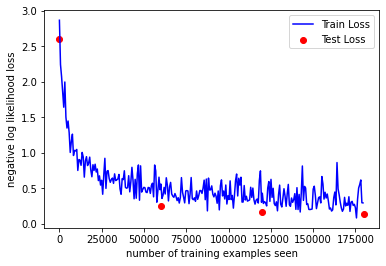

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
print(test_counter, test_losses)
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Text(0, 0.5, 'mse')

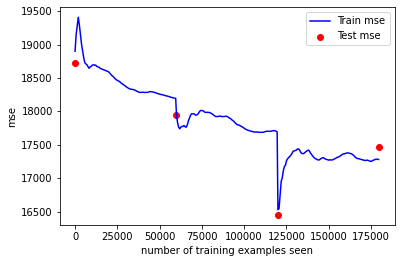

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_mse, color='blue')
plt.scatter(test_counter, test_mse, color='red')
plt.legend(['Train mse', 'Test mse'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('mse')

Text(0, 0.5, 'mse_ratio')

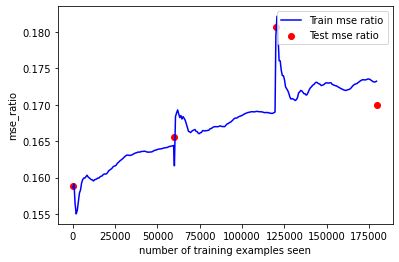

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_mse_ratio, color='blue')
plt.scatter(test_counter, test_mse_ratio, color='red')
plt.legend(['Train mse ratio', 'Test mse ratio'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('mse_ratio')

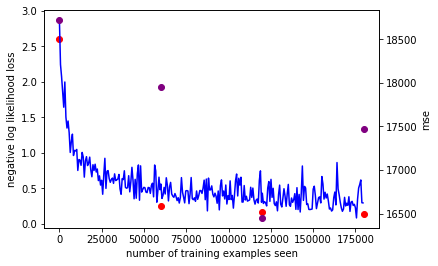

In [ ]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(train_counter,
        train_losses, 
        color='blue',
        )
plt.scatter(test_counter, test_losses, color='red')
# set x-axis label
ax.set_xlabel("number of training examples seen")
# set y-axis label
ax.set_ylabel("negative log likelihood loss")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.scatter(test_counter, test_mse, color='purple')
ax2.set_ylabel("mse")
plt.show()
# save the plot as a file



## Retrieve decryption key

In [ ]:
# Load the .pth file for debugging
checkpoint = torch.load("model.pth")

# Print the keys of the checkpoint dictionary
print(checkpoint.keys())

# Access the model parameters
#print(checkpoint["linear.bias"])
decryption_key =checkpoint["linear.weight"]
print(decryption_key)
#print(checkpoint["conv2.weight"].shape)






odict_keys(['linear.weight', 'conv.weight', 'conv.bias', 'conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])
tensor([[-0.1018, -0.1716, -0.2140,  0.0454,  0.1866,  0.0394,  0.1047,  0.1211,
         -0.1888, -0.3682,  0.2447,  0.0370, -0.0741,  0.1613, -0.1621,  0.2859],
        [ 0.0017, -0.1655, -0.1226, -0.1124, -0.1213,  0.2029, -0.1094,  0.2401,
         -0.1272, -0.1987,  0.1174, -0.1547, -0.1537,  0.1209,  0.1027, -0.1621],
        [-0.1861,  0.1433, -0.1153,  0.2521,  0.0101,  0.1800,  0.2690,  0.2400,
          0.0164,  0.1476, -0.0993,  0.2385, -0.0629,  0.0852,  0.0288,  0.0454],
        [-0.1230, -0.0742,  0.0819,  0.2260,  0.0799, -0.2375,  0.2612, -0.1635,
         -0.1979, -0.2071, -0.2111,  0.1327, -0.2191,  0.0298,  0.1899,  0.2093],
        [ 0.0222, -0.0606,  0.1735,  0.1379,  0.1728,  0.0163, -0.1818,  0.1427,
         -0.1298, -0.2906,  0.1206,  0.1061, -0.0974,  0.1132,  0.1190,  0.0594],
        [ 0.165

In [ ]:
print(torch.cuda.is_available())


False


## Measure the performance

0 2266 15855 54406


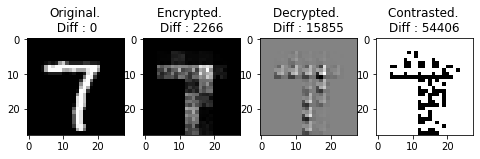

In [ ]:
import torch
import torchvision.transforms as transforms

decryption_key = torch.tensor([[-0.0406, -0.2205, -0.2345,  0.0516,  0.2553,  0.1174, -0.0881,  0.0445,
         -0.0515, -0.0218,  0.0256,  0.1152,  0.2704,  0.0139, -0.0416, -0.2248],
        [ 0.1326, -0.2687, -0.0580,  0.0798, -0.1886, -0.0995,  0.0168,  0.0363,
         -0.2119, -0.2622,  0.1903, -0.1340, -0.1291, -0.2084,  0.0673,  0.1520],
        [ 0.2392, -0.0140,  0.3176, -0.1038, -0.2321, -0.1370,  0.2435, -0.0465,
          0.0214, -0.1940, -0.1334, -0.2444, -0.2416, -0.2463, -0.1195, -0.1867],
        [ 0.1268, -0.0260,  0.3834,  0.0249, -0.2893,  0.1652,  0.3941, -0.1653,
          0.0276, -0.1844, -0.0711, -0.1271, -0.0859,  0.1057,  0.2015,  0.1808],
        [-0.0715, -0.1286,  0.0479,  0.0711, -0.1813, -0.1160,  0.1621, -0.2061,
          0.0345,  0.1237,  0.0908,  0.1486, -0.0244, -0.1429,  0.2383,  0.2710],
        [-0.0076,  0.1040,  0.2808, -0.1069,  0.0051, -0.0769,  0.3704,  0.1565,
         -0.0337,  0.0157, -0.0601,  0.0973,  0.1515, -0.3276, -0.2488,  0.1092],
        [-0.1366, -0.1422,  0.0112,  0.0502,  0.3071, -0.2069, -0.2165,  0.0789,
          0.2226,  0.3288,  0.0232,  0.0168, -0.0985,  0.0507, -0.2123,  0.2250],
        [ 0.2101,  0.1739,  0.2607,  0.0527,  0.0005, -0.1994,  0.0475, -0.2355,
          0.1425,  0.2005,  0.1572,  0.1196, -0.0515, -0.2138,  0.0873,  0.0949],
        [ 0.2761,  0.0106, -0.2218, -0.2023, -0.0424,  0.1220, -0.1093,  0.1901,
          0.1211,  0.0350,  0.2148, -0.0985,  0.2916,  0.0039, -0.0678,  0.0328],
        [ 0.1434,  0.2086, -0.0467,  0.0660,  0.2016,  0.2580,  0.3564,  0.1895,
          0.2616, -0.1057,  0.1119,  0.1607, -0.0272, -0.0892, -0.1575, -0.0302],
        [ 0.1670,  0.1425,  0.0411, -0.1002, -0.2108,  0.0395, -0.0021, -0.1361,
         -0.0934, -0.1713, -0.0344, -0.0486, -0.2287,  0.1328,  0.0501, -0.1663],
        [-0.0200,  0.2090, -0.1277, -0.0157, -0.1328,  0.1918,  0.0314,  0.0181,
          0.0252,  0.1990, -0.2719, -0.0084, -0.1887,  0.0358,  0.2022, -0.1191],
        [-0.3246, -0.3250, -0.2898, -0.2028,  0.0645, -0.2444, -0.2418,  0.0048,
          0.1536,  0.3925,  0.0231,  0.2302,  0.3490,  0.2380, -0.1476,  0.0996],
        [-0.1863, -0.0061,  0.0701, -0.1754, -0.1571,  0.2477,  0.0076, -0.1043,
          0.1027, -0.0889,  0.0732, -0.0838,  0.2569,  0.0195, -0.2198,  0.0894],
        [-0.1414,  0.1179,  0.1228, -0.0787, -0.0561,  0.1653,  0.0858,  0.0551,
         -0.0397, -0.3532, -0.2650,  0.2119, -0.1793, -0.2298,  0.1175, -0.1694],
        [ 0.0186,  0.1433, -0.1102, -0.1694,  0.0964,  0.1051, -0.0337,  0.1411,
          0.2272,  0.1627,  0.2988,  0.1341,  0.2609,  0.2315,  0.3075, -0.0008]])

decryption_key = torch.tensor([[-0.1018, -0.1716, -0.2140,  0.0454,  0.1866,  0.0394,  0.1047,  0.1211,
         -0.1888, -0.3682,  0.2447,  0.0370, -0.0741,  0.1613, -0.1621,  0.2859],
        [ 0.0017, -0.1655, -0.1226, -0.1124, -0.1213,  0.2029, -0.1094,  0.2401,
         -0.1272, -0.1987,  0.1174, -0.1547, -0.1537,  0.1209,  0.1027, -0.1621],
        [-0.1861,  0.1433, -0.1153,  0.2521,  0.0101,  0.1800,  0.2690,  0.2400,
          0.0164,  0.1476, -0.0993,  0.2385, -0.0629,  0.0852,  0.0288,  0.0454],
        [-0.1230, -0.0742,  0.0819,  0.2260,  0.0799, -0.2375,  0.2612, -0.1635,
         -0.1979, -0.2071, -0.2111,  0.1327, -0.2191,  0.0298,  0.1899,  0.2093],
        [ 0.0222, -0.0606,  0.1735,  0.1379,  0.1728,  0.0163, -0.1818,  0.1427,
         -0.1298, -0.2906,  0.1206,  0.1061, -0.0974,  0.1132,  0.1190,  0.0594],
        [ 0.1655, -0.2338, -0.0274,  0.0557, -0.0313,  0.1566,  0.2217,  0.1389,
         -0.1169, -0.3188, -0.0081, -0.2218,  0.1537, -0.1996,  0.0991,  0.2985],
        [-0.0759, -0.1459,  0.2874, -0.1697,  0.2060,  0.1975,  0.2192, -0.1780,
          0.2369, -0.0398,  0.1600,  0.0761, -0.1663, -0.2990,  0.1803,  0.2056],
        [ 0.2987,  0.0714,  0.1814, -0.0314, -0.0223, -0.1503,  0.0868, -0.0443,
         -0.0670, -0.3312, -0.2800,  0.1860, -0.1900, -0.2031, -0.0180, -0.0145],
        [-0.1115,  0.1792,  0.0168, -0.1543, -0.1073,  0.0787, -0.0926,  0.0839,
         -0.2162, -0.1729, -0.0454, -0.1158, -0.2837, -0.1687,  0.0021, -0.0336],
        [-0.0394,  0.0072, -0.1188,  0.2751,  0.2499,  0.2179,  0.3405, -0.0568,
          0.2035, -0.2908, -0.1520,  0.1432,  0.0914, -0.2668, -0.0299, -0.0558],
        [ 0.2847,  0.0030,  0.1039,  0.1320,  0.1603,  0.1190, -0.1460,  0.0268,
          0.2306,  0.3195,  0.0404,  0.2286,  0.1599, -0.1521,  0.0483,  0.0039],
        [ 0.0057,  0.0979, -0.2251,  0.2384,  0.0916,  0.2523,  0.1132,  0.2570,
         -0.2314, -0.0532, -0.2414, -0.2032, -0.0885,  0.0383, -0.1597,  0.1316],
        [-0.2134, -0.2457, -0.2248,  0.0172,  0.1993, -0.0664, -0.1199,  0.1712,
         -0.1474, -0.2192,  0.0182, -0.0312, -0.0459, -0.1335, -0.3094,  0.1079],
        [-0.1901, -0.2179,  0.0370, -0.1581, -0.1223, -0.0253,  0.0803,  0.2082,
         -0.1683, -0.2676, -0.2432,  0.0177, -0.2755, -0.1720, -0.1965,  0.0035],
        [-0.1514,  0.0777, -0.2522,  0.1226,  0.1370,  0.0790, -0.2595,  0.2406,
          0.1379,  0.1058,  0.0691, -0.1898,  0.0444,  0.0801, -0.1785, -0.0824],
        [-0.2726, -0.0004,  0.0703, -0.0971, -0.0449,  0.1284, -0.1072,  0.0133,
         -0.2553,  0.0463,  0.1117,  0.1584, -0.0823,  0.2170,  0.0183,  0.0727]])


def contrast(img):
  img_normalized = normalize(img)
  # Apply the transform to the image
  #print(img)
  result = torch.where(img_normalized > 127, torch.tensor([255.]), torch.tensor([0.]))
  return result



example_data = normalize(example_data)
img_encrypted = normalize(encrypt(example_data, w_matrix))
img_decrypted = normalize(encrypt(img_encrypted, decryption_key))
img_contrast = normalize(contrast(img_decrypted))


i = 4

# Ask the user for the lengths of the sides
a = int(diff(example_data, img_decrypted)[i][0].item())
b = int(diff(example_data, img_encrypted)[i][0].item())
c = int(diff(example_data, img_contrast)[i][0].item())
d = int(diff(example_data, example_data)[i][0].item())


fig, axs = plt.subplots(1, 4, figsize=(8,8))
axs[0].imshow(example_data[i][0], cmap = "gray", interpolation='none')
axs[0].set_title('Original.\n Diff : {}'.format(d))
axs[1].imshow(img_encrypted[i][0], cmap = "gray", interpolation='none')
axs[1].set_title('Encrypted. \nDiff : {}'.format(b))
axs[2].imshow(img_decrypted[i][0], cmap = "gray", interpolation='none')
axs[2].set_title('Decrypted. \nDiff : {}'.format(a))
axs[3].imshow(img_contrast[i][0], cmap = "gray", interpolation='none')
axs[3].set_title('Contrasted. \nDiff : {}'.format(c))

#fig.subplots_adjust(wspace=2)


print(d, b,a,c)
#print(example_data == example_data)


In [ ]:
import torch

ta = torch.tensor([1, 2])
tb = torch.tensor([3, 4])
print(torch.div(tb, ta))

tensor([3., 2.])
